In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as ploting
import seaborn as sns
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr','BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r','ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r','Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r','RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r','nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

In [3]:
import glob        #  import glob aglob term is define pattern matching
import random      #  IMporting random for generating random colors 
import os          #  Importing OS . 
data = [f for f in glob.glob('/content/gdrive/MyDrive/vishal/gait-in-parkinsons-disease-1.0.0' + "/**/*", recursive=True) if not os.path.isdir(f)]
# read all the image in our dataset 

In [4]:
len(data)

312

## Reading Extracted Features

In [5]:
import pandas as pd
Features = pd.read_csv('/content/gdrive/MyDrive/vishal/features.csv' , nrows = 141)
classes = pd.read_csv('/content/gdrive/MyDrive/vishal/classes.csv',names=["cals"] , nrows=141)

In [6]:
# Getting the Information about the dataset here we are using the dataset in which the features is already extracted using Feature extraction Code written in matlab.
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 419 entries, Height to Features417
dtypes: float64(419)
memory usage: 461.7 KB


Here we are Filling the missing features with meadian value

In [7]:
# Using the inbuilt feature filling meathod it fill the missing value using median.
Features = Features.fillna(Features.median())

In [8]:
# Here we are checking for null values in the dataset - Classes
classes.isnull().sum() 

cals    0
dtype: int64

In [9]:
import numpy as np
# Features.replace("NaN",np.nan, inplace=True)

In [10]:
# Here we are using the concat function of pandas for concatnation of two dataframe
df = pd.concat([Features, classes], axis=1)
# reseting the index of the dataframe 
df = df.reset_index()

In [11]:
# Checking If there is having any infinite value or not 
np.all(np.isfinite(df))

True

In [12]:
# Imputing the values with median
df = df.fillna(df.median())

In [13]:
# getting the inforamation about the final dataframe it tells we have 419 columns having 
# the value with datatype float64 and 2 columns having the data with datatype int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 421 entries, index to cals
dtypes: float64(419), int64(2)
memory usage: 463.9 KB


In [14]:
import sys , warnings
warnings.filterwarnings('ignore')
def show_count_plot(feature, title, df, size=1, ordered=True):
    ### setting the figure size of the plot
    f, ax = ploting.subplots(1,1, figsize=(4*size,4))
    ### Getting the total lenth of df in float
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:50], palette=random.choice(cmap))
    else:
        g = sns.countplot(df[feature], palette=random.choice(cmap))
        ### Setting the tittle of the plot
    g.set_title(title)
    ## If size given is greater than 2 then the labels automatically gets rotated
    if(size > 2):
      ### Here we are setting the X_ticks
        ploting.xticks(rotation=90, size=8)

    ploting.show()    

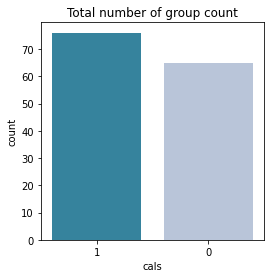

In [15]:
show_count_plot("cals" , "Total number of group count" , df)

In [16]:
# taking the dependent column in Y
Y = df["cals"]
# taking the Independent column in X
X = df.drop(["cals"] , axis = 1)

This is the function for the ROC Curve Plot 

In [17]:
import matplotlib.pyplot as pylot
pylot.figure(figsize=(8,6))
### Predicting the Y predict in by giving the X_text_final
from sklearn.metrics import roc_curve

def roc_curve_pylot(y_tst , y_pred , name):
    fpr = {}### False positive Rate
    tpr = {}### True Positive Raate
    thresh ={}
    ### Here we are giving the class name 
    class_names = ['PD' , 'CO']
    ### here there are 3 classes in the sentiment
    n_class = 2
    
    for i in range(n_class):  
        ### here we are Getting the curve  
        fpr[i], tpr[i], thresh[i] = roc_curve(y_tst , y_pred, pos_label=i)

    ### Getting  labels    
    pylot.plot(fpr[0], tpr[0] ,color='orange', label='PD')
    ### Here we are giving the color of Normal line orange
    pylot.plot(fpr[1], tpr[1] ,color='green', label='CO')
    ### Here we are giving the color of Generic line green

    pylot.title(f'Binary ROC curve for {name}')
    ### Setting the tittle of curve
    pylot.xlabel('False Positive Rate')
    ### Setting the X-label
    pylot.ylabel('True Positive rate')
    ### Setting the Y-tittle
    pylot.legend(loc='best')

<Figure size 576x432 with 0 Axes>

**This is the code for Generating the report that include Confusion matrix , classification report , accuracy , precession ,recall, F1score .**

---



---



In [183]:
from sklearn.metrics import confusion_matrix# Basic liberary for result showing
from sklearn.metrics import classification_report# Basic liberary for model building   
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
import random

def report_generator(y_tst , y_pred , title="Testing" , rnd=2):                                                # defining the report Generation function
    '''This is a tailored function for producing reports and obtaining confusion matrices.'''

    sentiment_classes = ['Healthy','PD']
    print(" ")
    ploting.figure(figsize=(8,6))
    ### for the figure size we are setting the size
    sns.heatmap(confusion_matrix(y_tst, y_pred) ,cmap=random.choice(cmap), fmt = 'd' ,annot = True , xticklabels=sentiment_classes,yticklabels=sentiment_classes)
    ploting.title(f'Confusion matrix {title}', fontsize=16)
    # Setting the tittle of the plot
    ploting.xlabel('Actual label', fontsize=12)
    ### for the plot we are giving the Xlabel
    ploting.ylabel('Predicted label', fontsize=12)
    ### for the plot we are giving the Ylabel
    print(classification_report(y_tst, y_pred))
    ### Generating the classification report
    print(" ")
    ### for the plot we are giving the Accuracy
    accuracy = accuracy_score(y_tst, y_pred)
    ### for the plot we are giving the accuracy
    print("  ")
    print("="*50)
    print(f'{title} Accuracy   : {round(accuracy , rnd)}')
    precision = precision_score(y_tst, y_pred,average='weighted')#estimating precision__score_
    recall = recall_score(y_tst, y_pred,average='weighted')#estimating recall___score
    f1score = f1_score(y_tst, y_pred,average='weighted')#esimaating f1_score
    print(f'{title} precision  : {round(precision , rnd)}')
    print(f'{title} recall     : {round(recall , rnd)}')
    print(f'{title} f1score    : {round(f1score , rnd)}')
    print("="*50)
    print("  ")

In [244]:
# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

Fold:1, Train set: 126, Test set:15
Fold:2, Train set: 127, Test set:14
Fold:3, Train set: 127, Test set:14
Fold:4, Train set: 127, Test set:14
Fold:5, Train set: 127, Test set:14
Fold:6, Train set: 127, Test set:14
Fold:7, Train set: 127, Test set:14
Fold:8, Train set: 127, Test set:14
Fold:9, Train set: 127, Test set:14
Fold:10, Train set: 127, Test set:14


In [275]:
from sklearn.model_selection import train_test_split # For spliting the data into train test --> To verify the model accuracy
X_trn, X_tst, y_trn, y_tst = train_test_split(X, Y, test_size=0.2, random_state=1)                    

Here we are scaling the data using standard scaler.

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler().fit(X)#scaling the training set
X_trn = scaling.transform(X_trn)#transforming the scaler in training set
X_tst = scaling.transform(X_tst)#transforming the scaler in training set

Let's apply our Model to the Extracted Features and Classes

---



---



 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

 
  
Testing Adaboost Accuracy   : 1.0
Testing Adaboost precision  : 1.0
Testing Adaboost recall     : 1.0
Testing Adaboost f1score    : 1.0
  


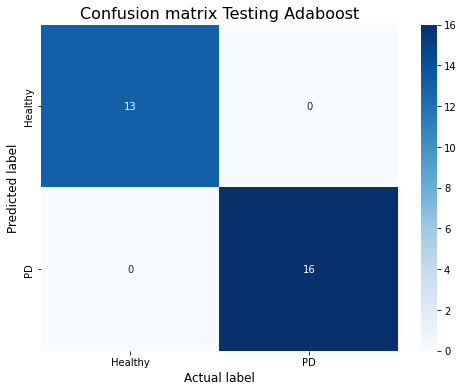

In [265]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=10, learning_rate=0.0001, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_trn, y_trn)


#Predict the response for test dataset
y_pred = model1.predict(X_tst)
report_generator(y_tst , y_pred , "Testing Adaboost" , 6)

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        60

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

 
  
Training Result Adaboost Accuracy   : 1.0
Training Result Adaboost precision  : 1.0
Training Result Adaboost recall     : 1.0
Training Result Adaboost f1score    : 1.0
  


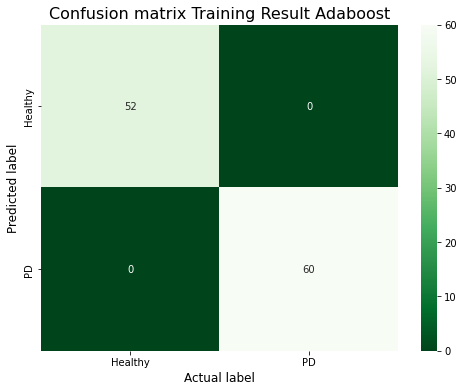

In [266]:
#Predict the response for test dataset
y_pred_train = model1.predict(X_trn)
report_generator(y_trn , y_pred_train , "Training Result Adaboost" , 6)

#Cross Valildation on Testing data - Adaboost classifier

In [272]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(random_state= 0), X_tst,y_tst , cv= kf, scoring="accuracy")
i = 1
for scr in score:
    print(f'Scores for {i}. fold is: {scr}')
    i = i + 1
print(" ")
print(f'Average Accuracy: {"{:.2f}".format(score.mean())}')

Scores for 1. fold is: 1.0
Scores for 2. fold is: 1.0
Scores for 3. fold is: 1.0
Scores for 4. fold is: 1.0
Scores for 5. fold is: 1.0
Scores for 6. fold is: 1.0
Scores for 7. fold is: 1.0
Scores for 8. fold is: 1.0
Scores for 9. fold is: 0.6666666666666666
Scores for 10. fold is: 1.0
 
Average Accuracy: 0.97


In [271]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(random_state= 42), X_tst,y_tst , cv= kf, scoring="precision")
i = 1
for scr in score:
    print(f'Scores for {i}. fold is: {scr}')
    i = i + 1
print(" ")
print(f'Average Precession: {"{:.2f}".format(score.mean())}')

Scores for 1. fold is: 1.0
Scores for 2. fold is: 1.0
Scores for 3. fold is: 1.0
Scores for 4. fold is: 1.0
Scores for 5. fold is: 1.0
Scores for 6. fold is: 1.0
Scores for 7. fold is: 1.0
Scores for 8. fold is: 1.0
Scores for 9. fold is: 0.6666666666666666
Scores for 10. fold is: 1.0
 
Average Precession: 0.97


In [270]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
score = cross_val_score(AdaBoostClassifier(random_state= 42), X_tst,y_tst , cv= kf, scoring="recall")
i = 1
for scr in score:
    print(f'Scores for {i}. fold is: {scr}')
    i = i + 1
print(" ")
print(f'Average Recall: {"{:.2f}".format(score.mean())}')

Scores for 1. fold is: 1.0
Scores for 2. fold is: 1.0
Scores for 3. fold is: 1.0
Scores for 4. fold is: 1.0
Scores for 5. fold is: 1.0
Scores for 6. fold is: 1.0
Scores for 7. fold is: 1.0
Scores for 8. fold is: 1.0
Scores for 9. fold is: 1.0
Scores for 10. fold is: 1.0
 
Average Recall: 1.00


## Gaussian Process Classifier

In [284]:
from sklearn.model_selection import train_test_split # For spliting the data into train test --> To verify the model accuracy
X_trn, X_tst, y_trn, y_tst = train_test_split(X, Y, test_size=0.2, random_state=0)     

In [285]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(10.0)

from sklearn.gaussian_process import GaussianProcessClassifier
classifier = GaussianProcessClassifier(kernel=kernel ,  max_iter_predict=100)

classifier.fit(X_trn, y_trn)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=10))

 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.94      1.00      0.97        17

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

 
  
Testing GBC Accuracy   : 0.965517
Testing GBC precision  : 0.967433
Testing GBC recall     : 0.965517
Testing GBC f1score    : 0.96526
  


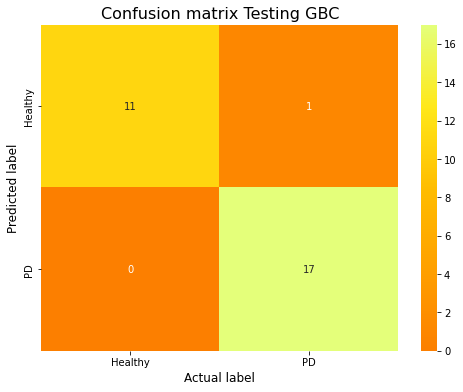

In [286]:
y_pred = classifier.predict(X_tst)
report_generator(y_tst , y_pred , "Testing GBC" , 6)

 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        59

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

 
  
Training Result GBC Accuracy   : 1.0
Training Result GBC precision  : 1.0
Training Result GBC recall     : 1.0
Training Result GBC f1score    : 1.0
  


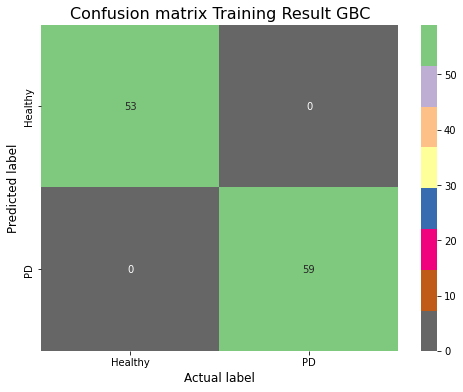

In [287]:
#Predict the response for test dataset
y_pred_train = classifier.predict(X_trn)
report_generator(y_trn , y_pred_train , "Training Result GBC" , 6)

## Crossvalidating GBC classifier

In [288]:
score = cross_val_score(GaussianProcessClassifier(kernel=kernel), X_tst,y_tst , cv= kf, scoring="accuracy")
i = 1
for scr in score:
    print(f'Scores for {i}. fold is: {scr}')
    i = i + 1
print(" ")
print(f'Average Accuracy: {"{:.2f}".format(score.mean())}')

Scores for 1. fold is: 1.0
Scores for 2. fold is: 1.0
Scores for 3. fold is: 1.0
Scores for 4. fold is: 1.0
Scores for 5. fold is: 1.0
Scores for 6. fold is: 1.0
Scores for 7. fold is: 1.0
Scores for 8. fold is: 1.0
Scores for 9. fold is: 1.0
Scores for 10. fold is: 1.0
 
Average Accuracy: 1.00


In [289]:
score = cross_val_score(GaussianProcessClassifier(kernel=kernel), X_tst,y_tst , cv= kf, scoring="precision")
i = 1
for scr in score:
    print(f'Scores for {i}. fold is: {scr}')
    i = i + 1
print(" ")
print(f'Average Precession: {"{:.2f}".format(score.mean())}')

Scores for 1. fold is: 1.0
Scores for 2. fold is: 1.0
Scores for 3. fold is: 1.0
Scores for 4. fold is: 1.0
Scores for 5. fold is: 1.0
Scores for 6. fold is: 1.0
Scores for 7. fold is: 1.0
Scores for 8. fold is: 1.0
Scores for 9. fold is: 1.0
Scores for 10. fold is: 1.0
 
Average Precession: 1.00


In [290]:
score = cross_val_score(GaussianProcessClassifier(kernel=kernel), X_tst,y_tst , cv= kf, scoring="recall")
i = 1
for scr in score:
    print(f'Scores for {i}. fold is: {scr}')
    i = i + 1
print(" ")
print(f'Average Recall: {"{:.2f}".format(score.mean())}')

Scores for 1. fold is: 1.0
Scores for 2. fold is: 1.0
Scores for 3. fold is: 1.0
Scores for 4. fold is: 1.0
Scores for 5. fold is: 1.0
Scores for 6. fold is: 1.0
Scores for 7. fold is: 1.0
Scores for 8. fold is: 1.0
Scores for 9. fold is: 1.0
Scores for 10. fold is: 1.0
 
Average Recall: 1.00


GRAPHs

In [291]:
data[1]

'/content/gdrive/MyDrive/vishal/gait-in-parkinsons-disease-1.0.0/GaPt15_10.txt'

In [292]:
vgrf = pd.read_csv(data[1] , sep="\t" , names=["Time" , 'left_Vgrf0','left_Vgrf1','left_Vgrf2','left_Vgrf3', 'left_Vgrf4','left_Vgrf5','left_Vgrf6','left_Vgrf7','right_Vgrf0','right_Vgrf1','right_Vgrf2','right_Vgrf3','right_Vgrf4','right_Vgrf5','right_Vgrf6','right_Vgrf7','total_force_left','total_force_right'])

In [293]:
st = []
for i in range(0,8):
  st.append("right_Vgrf" + str(i))

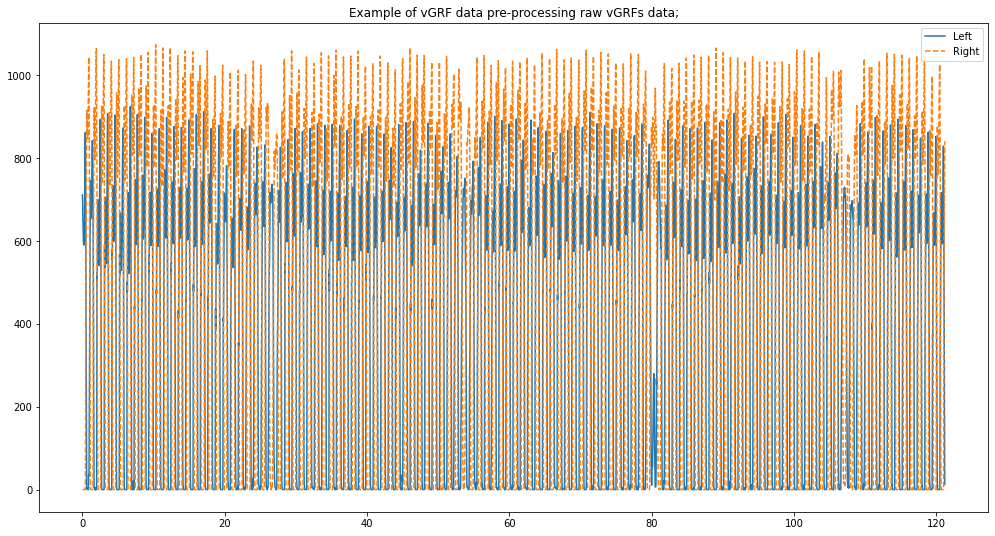

In [261]:
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,9))# Setting The Size of PLOT
x = np.array(vgrf['Time'])
y1 = np.array(vgrf['total_force_left'])
y2 = np.array(vgrf['total_force_right'])
plt.plot(x, y1, label = "Left")
plt.plot(x, y2, label = "Right", linestyle="--")
plt.title("Example of vGRF data pre-processing raw vGRFs data;")
plt.legend()
plt.show()

## Knowledge Graph

In [262]:
!pip install --upgrade pandas
# For importing the .xls file into datafram first we have to upgrade the xlrd liberry and pandas liberary
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [203]:
import pandas as pd
demographic = pd.read_excel(r'/content/gdrive/MyDrive/vishal/gait-in-parkinsons-disease-1.0.0/demographics.xls')

In [204]:
# Check fro unique values and its value count in the Group coloumn fo the demographic dataframe
demographic.Group.value_counts()

PD    93
CO    73
Name: Group, dtype: int64

In [205]:
# Checking for the unique columns in the demographic dataframe
demographic.columns

Index(['ID', 'Study', 'Group', 'Subjnum', 'Gender', 'Age', 'Height (meters)',
       'Weight (kg)', 'HoehnYahr', 'UPDRS', 'UPDRSM', 'TUAG',
       'Speed_01 (m/sec)', 'Speed_10'],
      dtype='object')

In [206]:
# Checking if there is any null value in the demographic dataframe and we found there are some null values in some columns
demographic.isnull().sum()

ID                    0
Study                 0
Group                 0
Subjnum               0
Gender                0
Age                   0
Height (meters)       3
Weight (kg)           3
HoehnYahr            55
UPDRS                31
UPDRSM               31
TUAG                 13
Speed_01 (m/sec)      1
Speed_10            146
dtype: int64

In [207]:
# imputing the null values with median
demographic = demographic.fillna(demographic.median())

In [208]:
# Checking if there is any null value in the demographic dataframe after imputing with median
demographic.isnull().sum()

ID                  0
Study               0
Group               0
Subjnum             0
Gender              0
Age                 0
Height (meters)     0
Weight (kg)         0
HoehnYahr           0
UPDRS               0
UPDRSM              0
TUAG                0
Speed_01 (m/sec)    0
Speed_10            0
dtype: int64

In [209]:
def ages(value):
  if value >=60:
    return "age >= 60"
  elif value <60:
    return  "age < 60"
 

In [210]:
def updrss(value):
  if value>=20 :
    return "scale >= 20"
  elif value >=10 and value<20:
      return "scale >= 10"
  elif value <10:
    return  "scale < 10"
 

In [211]:
demographic.head(5)

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,1.144,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,72.0,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579


In [212]:
# demographic['age'] = demographic.apply(lambda x: age(x["Gender"], x["Age"]), axis=1)

In [213]:
demographic['ages'] = demographic.apply(lambda x: ages(x["Age"]), axis=1)

In [214]:
demographic['updrss'] = demographic.apply(lambda x: updrss(x["UPDRS"]), axis=1)

*Knowledge Graph for demographic data dhowing the relation between entities such as age , group , gender .*

In [215]:
from graphviz import Digraph
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

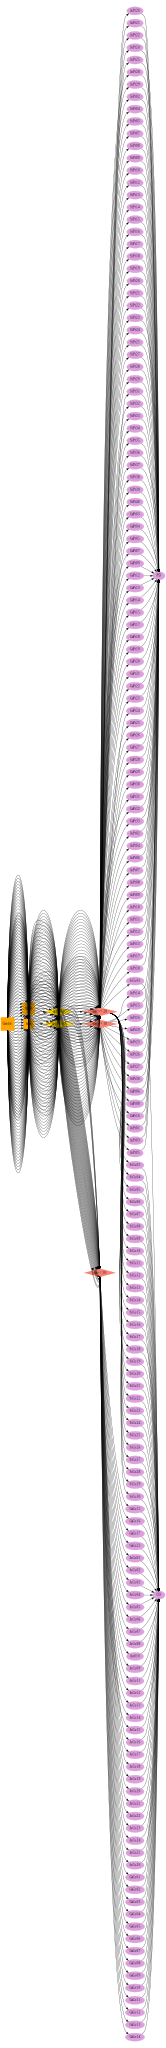

In [216]:
f = Digraph(engine='dot', filename='/content/gdrive/MyDrive/vishal/fsm.gv')
f.attr(rankdir='LR', size='600,500')
f.attr(fontsize='8pt')
f.attr('node', shape='Msquare',style='filled', color='orange')
for index, row in demographic.iterrows():
    first="Gender"
    second= row['Gender']
    f.edge(first,second, label="")

f.attr('node', shape='Mdiamond', style='filled',color='gold')
for index, row in demographic.iterrows():
    first=row['Gender']
    second= row['ages']
    f.edge(first,second, label="")

f.attr('node',shape='Mdiamond', style='filled',color='salmon')
for index, row in demographic.iterrows():
    first=row['ages']
    second= row['updrss']
    f.edge(first,second, label="")
f.attr(fontsize='8pt')
f.attr('node',shape='ellipse', style='filled',color='plum')
for index, row in demographic.iterrows():
    first=row['updrss']
    second=row['ID']
    f.edge(first,second, label="")
        
for index, row in demographic.iterrows():
    first=row['ID']
    second=row['Group']
    f.edge(first,second, label="")

f.view()
display(f)

In [217]:
f.render('/content/gdrive/MyDrive/vishal/pd.gv', view=True)

'/content/gdrive/MyDrive/vishal/pd.gv.pdf'